In [1]:
import utils
import torch
from models import GAT, SpGAT
import torch.nn.functional as F
import sklearn.metrics
import numpy as np
from torch.autograd import Variable
import pandas as pd

In [2]:
adj, features, labels, idx_train, idx_val, idx_test = utils.load_joshi_data("Cd8a")
features, adj, labels = Variable(features), Variable(adj), Variable(labels)

 loading from cache file../data/graphs/stringdb_coex_mouse_graph_coexpression_edges.adjlist


In [3]:
features.shape

torch.Size([1630, 176, 1])

In [4]:
model = GAT(ncells = features.shape[0], #features is cells x gene x gene features
                ngenes=features.shape[1], 
                nfeat=features.shape[2],
                nhid=1, 
                nclass=1, # regression
                dropout=0.6, 
                nheads=1, 
                alpha=0.2)

model

/gpfs/ysm/home/amth_av622/Gene-Network-Graphs/pyGAT/layers.py:32: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(self.Z)


GAT(
  (out_att): GraphAttentionLayer (1 -> 1)
)

In [5]:
list(model.parameters()) # optmized in AdamOptimizer

[Parameter containing:
 tensor([[-1.7914]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0569,  0.0320],
         [-0.0715,  0.0321],
         [-0.0660,  0.0028],
         ...,
         [-0.0542,  0.0580],
         [ 0.0119,  0.0483],
         [-0.0350, -0.0387]], requires_grad=True),
 Parameter containing:
 tensor([[[0.8151, 0.9848, 0.1950,  ..., 0.9992, 0.6181, 0.6702]],
 
         [[0.3928, 0.9645, 0.2827,  ..., 0.4002, 0.1892, 0.9930]],
 
         [[0.6265, 0.8297, 0.5565,  ..., 0.3723, 0.1170, 0.4622]],
 
         ...,
 
         [[0.9913, 0.5214, 0.5035,  ..., 0.6011, 0.8648, 0.2181]],
 
         [[0.7122, 0.2531, 0.9259,  ..., 0.0423, 0.5815, 0.9918]],
 
         [[0.4532, 0.8703, 0.3479,  ..., 0.4861, 0.4929, 0.1495]]],
        requires_grad=True)]

In [6]:
torch.load('999.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '999.pkl'

In [7]:
model.load_state_dict(torch.load('999.pkl'))

<All keys matched successfully>

In [7]:
def compute_test():
    model.eval()
    output, attention = model(features, adj)
    output = output.reshape(-1)
    loss_test = F.smooth_l1_loss(output[idx_test], labels[idx_test].float()).float()
    r2_test = sklearn.metrics.r2_score(labels[idx_test].cpu(), output[idx_test].cpu().detach().numpy())
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.data.item()),
          "r2_test= {:.4f}".format(r2_test))
    
    return (output, labels, attention)

In [8]:
output, labels, attention = compute_test()

Test set results: loss= 0.0109 r2_test= 0.3121


In [1]:
output

NameError: name 'output' is not defined

In [10]:
labels

tensor([1.2721, 1.3539, 1.1057,  ..., 0.7352, 0.8688, 0.9314])

In [11]:
attention[0]

tensor([[0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057, 0.0057,
         0.0057, 0.0057, 0.0

In [12]:
1 / 175

0.005714285714285714

In [13]:
pd.read_pickle("../data/joshi_processing/week8_ln_notebook_state.pkl")

<module '__main__'>

In [14]:
idx_test_mask = [True if l in idx_test.numpy() else False for l in range(labels.shape[0])]

In [15]:
ensembl_Cd8a = "ENSMUSG00000053977"

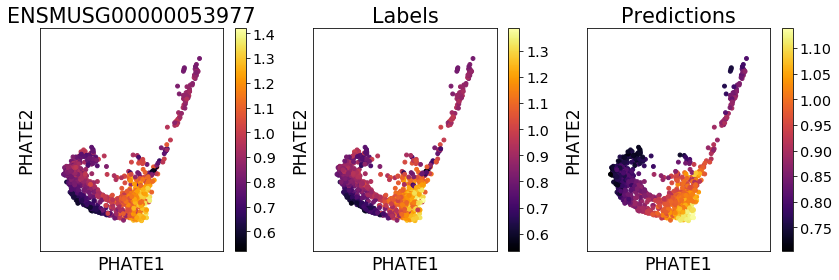

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
scprep.plot.scatter2d(data_phate_pc, ax=axes[0],fontsize=12, s=15, 
                      c=scprep.select.select_cols(data_magic_filt, exact_word=ensembl_Cd8a), 
                     title=ensembl_Cd8a, ticks=False, label_prefix="PHATE")
scprep.plot.scatter2d(data_phate_pc, ax=axes[1],fontsize=12, s=15, 
                      c=labels.detach().numpy(), title="Labels",ticks=False, label_prefix="PHATE")
scprep.plot.scatter2d(data_phate_pc, ax=axes[2],fontsize=12, s=15, 
                      c=output.detach().numpy(), title="Predictions",
                      ticks=False, label_prefix="PHATE")
plt.tight_layout()

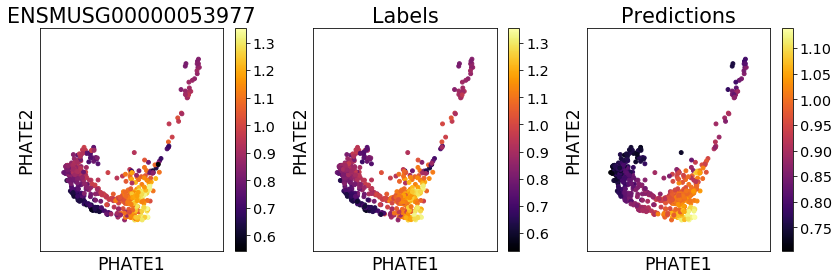

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
scprep.plot.scatter2d(data_phate_pc[idx_test_mask], ax=axes[0],fontsize=12, s=15, 
                      c=scprep.select.select_cols(data_magic_filt[idx_test_mask], exact_word=ensembl_Cd8a), 
                     title=ensembl_Cd8a, ticks=False, label_prefix="PHATE")
scprep.plot.scatter2d(data_phate_pc[idx_test_mask], ax=axes[1],fontsize=12, s=15, 
                      c=labels.detach().numpy()[idx_test_mask], title="Labels",ticks=False, label_prefix="PHATE")
scprep.plot.scatter2d(data_phate_pc[idx_test_mask], ax=axes[2],fontsize=12, s=15, 
                      c=output.detach().numpy()[idx_test_mask], title="Predictions",
                      ticks=False, label_prefix="PHATE")
plt.tight_layout()